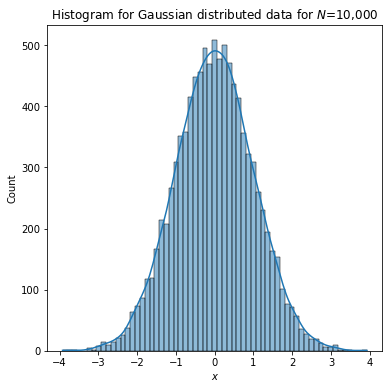

In [1]:
# import basic modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)  # reproducibility
%matplotlib inline

# create some randomly standard normal distributed data:
data = np.random.randn(10000)

# plot standard normal distributed data:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(data=data, kde=True, ax=ax)
ax.set_xlabel('$x$')
ax.set_title('Histogram for Gaussian distributed data for $N$=10,000');

# fig.savefig('hist_gauss_kde.png')

1.1640601525859375


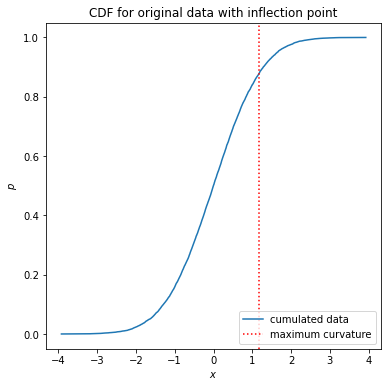

In [2]:
# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1 * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data_sorted, p, label='cumulated data')
ax.set_xlabel('$x$');
ax.set_ylabel('$p$');

curvature = np.absolute(np.gradient(np.gradient(data_sorted))
                        ) / (1+(np.gradient(data_sorted))**2)**1.5
y_max_curvature_down = np.max(curvature)
y_max_curvature_up = np.absolute(y_max_curvature_down-1)

x_max_curvature_up = data_sorted[np.where(p >= y_max_curvature_up)][0]
print(x_max_curvature_up)
ax.axvline(x_max_curvature_up, color='red', ls=':', label='maximum curvature')
ax.legend(loc='lower right');

ax.set_title('CDF for original data with inflection point');

# fig.savefig('CDF_gauss_maxcur.png')

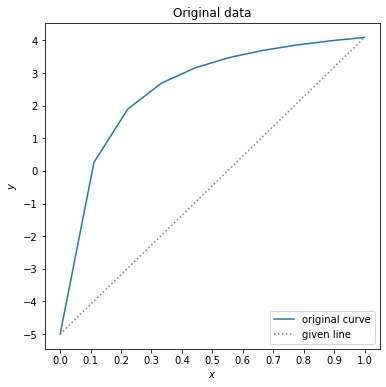

In [13]:
import kneed

data_sorted, p = kneed.DataGenerator.figure2()

# plot orignal curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data_sorted, p, label='original curve')
ax.plot([np.min(data_sorted), np.max(data_sorted)], [np.min(p), np.max(p)],
        color='grey', linestyle=':', label='given line')
ax.set_title('Original data');
ax.legend(loc='lower right');

ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(-5, 5, 1))

ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

# fig.savefig('fig2_orig-data.png')

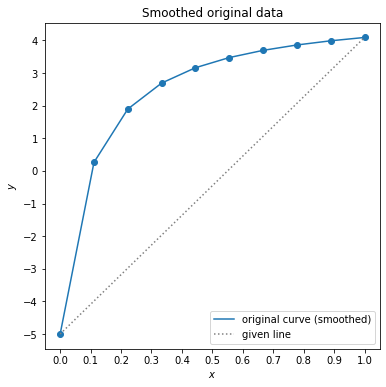

In [4]:
# smoothing line
from scipy.interpolate import interp1d

data_sorted_new = np.linspace(data_sorted.min(), data_sorted.max(), 10)

f = interp1d(data_sorted, p, kind='quadratic')
p_smooth = f(data_sorted_new)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data_sorted_new, p_smooth, label='original curve (smoothed)')
ax.scatter(data_sorted, p)
ax.plot([np.min(data_sorted_new), np.max(data_sorted_new)], [np.min(p_smooth), np.max(p_smooth)],
        color='grey', linestyle=':', label='given line')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_title('Smoothed original data')
ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(-5, 5, 1))
ax.legend(loc='lower right');

# fig.savefig('fig2_orig-data_smoothed.png')

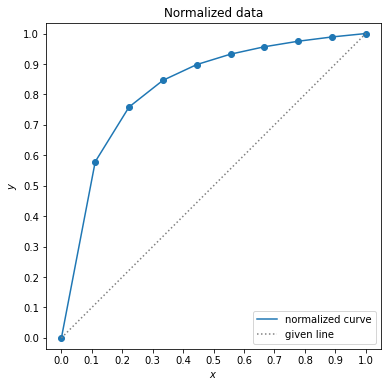

In [5]:
# normalize data, calculate differences
data_sorted_norm = (data_sorted_new - np.min(data_sorted_new)) / \
    (np.max(data_sorted_new) - np.min(data_sorted_new))
p_norm = (p_smooth - np.min(p_smooth)) / (np.max(p_smooth) - np.min(p_smooth))

p_difference = p_norm - data_sorted_norm

# plot normalized curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data_sorted_norm, p_norm, label='normalized curve')
ax.plot([np.min(data_sorted_norm), np.max(data_sorted_norm)], [np.min(p_norm), np.max(p_norm)],
        color='grey', linestyle=':', label='given line')
ax.scatter(data_sorted_norm, p_norm)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Normalized data');
ax.legend(loc='lower right')

ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.axis('equal');  # important!

# fig.savefig('fig2_normalized-data.png')

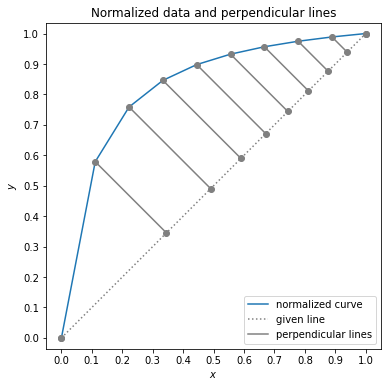

In [6]:
# plotting perpendicular lines on normalized data
line_point1 = [np.min(data_sorted_norm), np.min(p_norm)]
line_point2 = [np.max(data_sorted_norm), np.max(p_norm)]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data_sorted_norm, p_norm, label='normalized curve')
ax.plot([np.min(data_sorted_norm), np.max(data_sorted_norm)], [np.min(p_norm), np.max(p_norm)],
        color='grey', linestyle=':')

for i in range(0, 10):
    random_point = [data_sorted_norm[i], p_norm[i]]

    def line(x, get_eq=False):
        m = (line_point1[1] - line_point2[1])/(line_point1[0] - line_point2[0])
        b = line_point1[1] - m*line_point1[0]
        if get_eq:
            return m, b
        else:
            return m*x + b

    def perpendicular_line(x, get_eq=False):
        m, b = line(0, True)
        m2 = -1/m
        b2 = random_point[1] - m2*random_point[0]
        if get_eq:
            return m2, b2
        else:
            return m2*x + b2

    def get_intersection():
        m, b = line(0, True)
        m2, b2 = perpendicular_line(0, True)
        x = (b2 - b) / (m - m2)
        y = line(x)
        return [x, y]

    intersection = get_intersection()
    ax.plot(intersection[0], intersection[1], 'grey')
    ax.plot([intersection[0], random_point[0]], [
            intersection[1], random_point[1]], color='grey', marker='o')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(['normalized curve', 'given line', 'perpendicular lines'],
          loc='lower right')
ax.set_title('Normalized data and perpendicular lines')
ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.axis('equal');  # important!

# fig.savefig('fig2_perpen-lines_normalized.png')

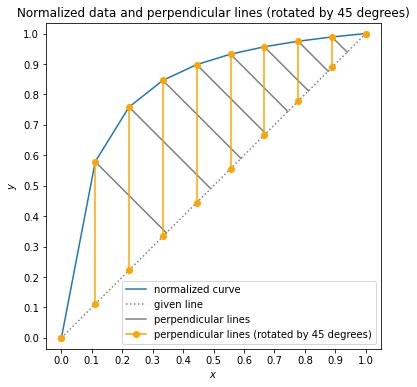

In [7]:
# rotating perpendicular lines by 45 degrees
line_point1 = [np.min(data_sorted_norm), np.min(p_norm)]
line_point2 = [np.max(data_sorted_norm), np.max(p_norm)]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data_sorted_norm, p_norm, label='normalized curve')
ax.plot([np.min(data_sorted_norm), np.max(data_sorted_norm)], [np.min(p_norm), np.max(p_norm)],
        color='grey', linestyle=':', label='given line')

for i in range(0, 10):
    random_point = [data_sorted_norm[i], p_norm[i]]

    def line(x, get_eq=False):
        m = (line_point1[1] - line_point2[1])/(line_point1[0] - line_point2[0])
        b = line_point1[1] - m*line_point1[0]
        if get_eq:
            return m, b
        else:
            return m*x + b

    def perpendicular_line(x, get_eq=False):
        m, b = line(0, True)
        m2 = -1/m
        b2 = random_point[1] - m2*random_point[0]
        if get_eq:
            return m2, b2
        else:
            return m2*x + b2

    def get_intersection():
        m, b = line(0, True)
        m2, b2 = perpendicular_line(0, True)
        x = (b2 - b) / (m - m2)
        y = line(x)
        return [x, y]

    intersection = get_intersection()
    ax.plot(intersection[0], intersection[1])
    ax.plot([intersection[0], random_point[0]], [intersection[1], random_point[1]],
            color='grey', label='perpendicular lines')
    ax.plot([data_sorted_norm[i], data_sorted_norm[i]], [data_sorted_norm[i], p_norm[i]],
            marker='o', color='orange', label='perpendicular lines (rotated by 45 degrees)')

ax.legend(loc='lower right')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# changed order of elements in legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

ax.set_title('Normalized data and perpendicular lines (rotated by 45 degrees)')
ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.axis('equal');  # important!

# fig.savefig('fig2_perpen-lines-45deg_normalized.png')

[0.22222222]


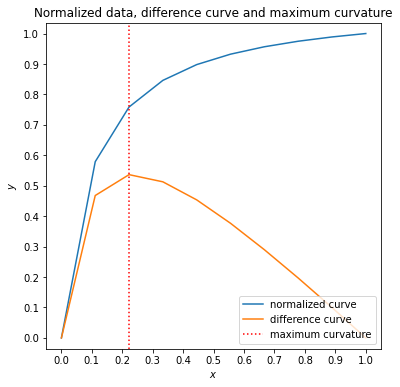

In [8]:
# normalize data, calculate differences
data_sorted_norm = (data_sorted - np.min(data_sorted)) / \
    (np.max(data_sorted) - np.min(data_sorted))
p_norm = (p - np.min(p)) / (np.max(p) - np.min(p))

p_difference = p_norm - data_sorted_norm

# plot difference curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# visualize maximum curvature (knee point)
knee = data_sorted[np.where(p_difference == np.max(p_difference))]
print(knee)

# plot
ax.plot(data_sorted_norm, p_norm, label='normalized curve')
ax.plot(data_sorted_norm, p_difference, label='difference curve')
ax.axvline(knee, color='red', ls=':', label='maximum curvature')
ax.legend(loc='lower right')

ax.set_title('Normalized data, difference curve and maximum curvature')
ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.axis('equal');

# fig.savefig('fig2_diff-maxcur_normalized.png')

0.42528735632183917


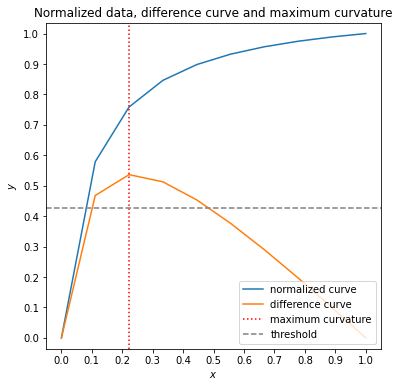

In [9]:
# normalize data, calculate differences
data_sorted_norm = (data_sorted - np.min(data_sorted)) / \
    (np.max(data_sorted) - np.min(data_sorted))
p_norm = (p - np.min(p)) / (np.max(p) - np.min(p))

p_difference = p_norm - data_sorted_norm

# plot difference curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# visualize maximum curvature (knee point)
knee = data_sorted[np.where(p_difference == np.max(p_difference))]

# calculate threshold
S = 1
n = len(data_sorted_norm)

threshold = np.max(p_difference) - S * \
    np.sum(np.diff(data_sorted_norm)) / (n-1)
print(threshold)

# plot
ax.plot(data_sorted_norm, p_norm, label='normalized curve')
ax.plot(data_sorted_norm, p_difference, label='difference curve')
ax.axvline(knee, color='red', ls=':', label='maximum curvature')
ax.axhline(threshold, color='grey', ls='--', label='threshold')
ax.legend(loc='lower right')

ax.set_title('Normalized data, difference curve and maximum curvature')
ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.axis('equal');

# fig.savefig('fig2_diff-treshold.png')

Elbow:  3


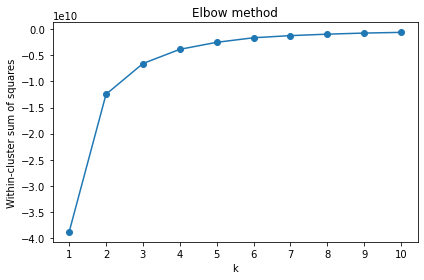

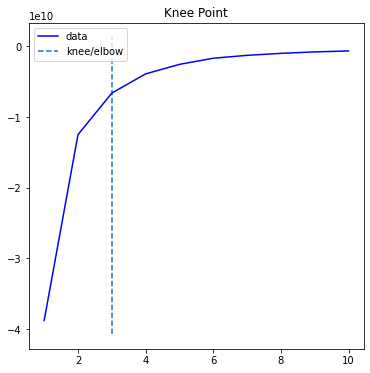

In [10]:
# https://www.kaggle.com/arjunbhasin2013/ccdata

from sklearn.cluster import KMeans

df = pd.read_csv('CC GENERAL.csv')
df_num = df.loc[:, ['BALANCE']]

cluster_scores = []
for n_cluster in range(1, 11):
    model = KMeans(n_clusters=n_cluster, random_state=0)
    model.fit(df_num)
    cluster_scores.append(model.score(df_num))

# plot WCSS from 1 to 10 clusters (elbow method)
fig, ax = plt.subplots()
ax.plot(range(1, 11), cluster_scores, marker='o')
ax.set(title="Elbow method", xlabel="k",
       ylabel="Within-cluster sum of squares")
ax.set_xticks(range(1, 11))
fig.tight_layout()

# fig.savefig('elbow_method.png')

# add elbow
kneedle = kneed.KneeLocator(x=list(range(1, 11)),
                            y=cluster_scores,
                            curve='concave',
                            direction='increasing',
                            online=True,
                            S=1)
knee_point = kneedle.knee
print('Elbow: ', knee_point)
kneedle.plot_knee()

# plt.savefig('elbow_method_kneed.png')

Elbow:  1777


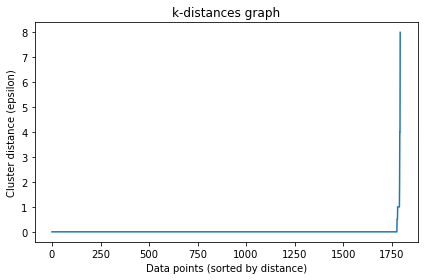

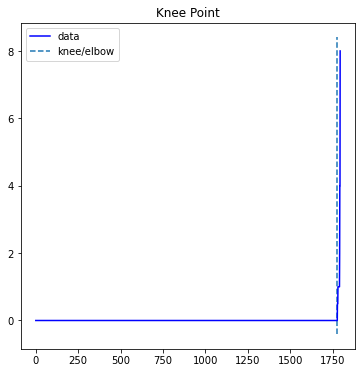

In [11]:
# https://www.kaggle.com/rtatman/chocolate-bar-ratings

# read data
from sklearn.metrics import euclidean_distances

df = pd.read_csv('flavors_of_cacao.csv')

# removing percent symbols and converting to numerical dtype
df['Cocoa\nPercent'] = list(map(lambda x: x[:-1], df['Cocoa\nPercent'].values))
df.loc[:, 'Cocoa\nPercent'] = pd.to_numeric(df.loc[:, 'Cocoa\nPercent'])


# selecting numerical columns only
df_num = df.loc[:, ['Cocoa\nPercent']]

# calculate euclidean distances and sort them
arr_dist = euclidean_distances(df_num)
arr_dist_sorted = np.sort(arr_dist, axis=1)

# plot k-distance graph
min_samples = 2 * df_num.shape[1]

fig, ax = plt.subplots()
ax.plot(range(len(arr_dist_sorted)), np.sort(arr_dist_sorted[:, min_samples]))
ax.set(title='k-distances graph', xlabel='Data points (sorted by distance)',
       ylabel='Cluster distance (epsilon)')
fig.tight_layout()

# fig.savefig('kdistances-graph.png')

# add knee
kneedle = kneed.KneeLocator(y=np.sort(arr_dist_sorted[:, min_samples]),
                            x=list(range(len(arr_dist_sorted))),
                            curve='convex',
                            direction='increasing',
                            online=True,
                            S=1)
elbow_point = kneedle.elbow
print('Elbow: ', elbow_point)
kneedle.plot_knee()

# plt.savefig('kdistances-graph_kneed.png')

Elbow:  0.055944055944055944


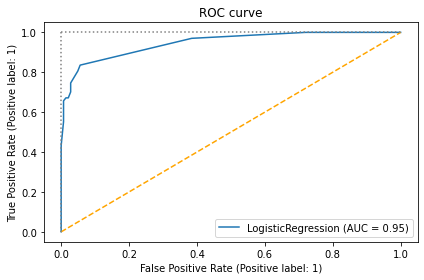

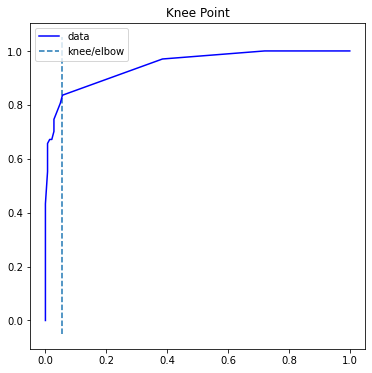

In [12]:
# https://www.kaggle.com/roustekbio/breast-cancer-csv

from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('breastCancer.csv')
df.loc[:, 'class'] = df.loc[:, 'class'].replace({2: 0, 4: 1})
df = df.dropna()

# Lösung:
X = df.loc[:, ['bland_chromatin', 'mitoses']]
# type(features_train)  # double-check for correct datatype format
y = df.loc[:, 'class']

features_train, features_test, target_train, target_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
features_train_std = scaler.fit_transform(features_train)
features_test_std = scaler.transform(features_test)

# best logistic regression model on train set
model_log = LogisticRegression(random_state=42)
model_log.fit(features_train_std, target_train)

target_test_pred_proba = model_log.predict_proba(features_test_std)

# plot roc curve
fig, ax = plt.subplots()
plot_roc_curve(model_log, features_test_std, target_test, ax=ax)

# reference lines
ax.plot([0, 1], ls="--", color='orange')  # blue diagonal
ax.plot([0, 0], [1, 0], ls=':', color='grey')  # grey vertical
ax.plot([1, 1], ls=':', color='grey')  # grey horizontal

ax.set(title="ROC curve")

fig.tight_layout()

# fig.savefig('roc-curve.png')

# calculate roc curve values
fpr, tpr, threshold = roc_curve(target_test,
                                target_test_pred_proba[:, 1],
                                drop_intermediate=False)

# add elbow
kneedle = kneed.KneeLocator(x=fpr,
                            y=tpr,
                            curve='concave',
                            direction='increasing',
                            online=False,
                            S=1)
elbow_point = kneedle.elbow
print('Elbow: ', elbow_point)
kneedle.plot_knee()

# plt.savefig('roc-curve_kneed.png')